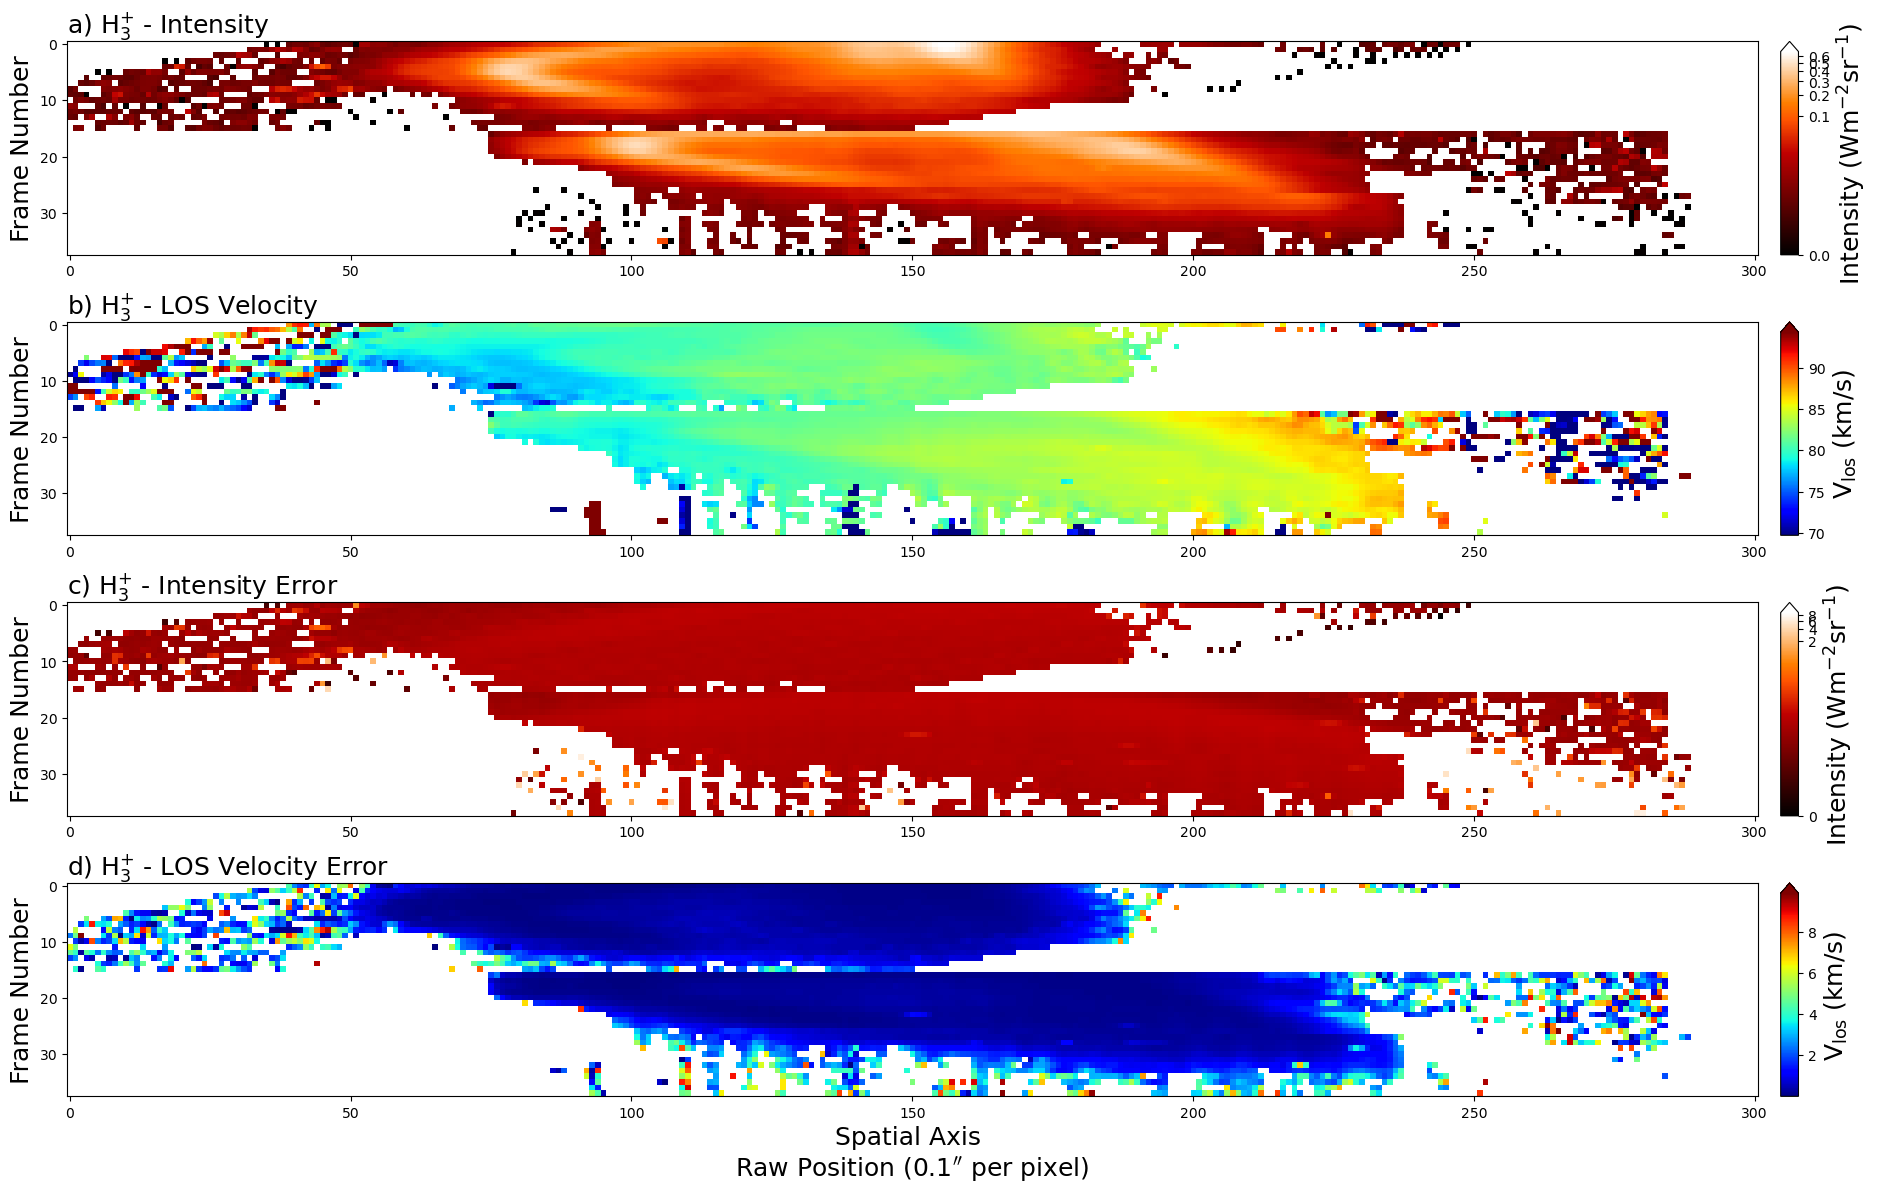

In [1]:
# import packages
from astropy.io import fits
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from lmfit import Model, fit_report
from lmfit.models import LinearModel


h3p_int_shifted = fits.open('h3p_int_shifted.fits', ignore_missing_end=True)[0].data
h3p_los_shifted = fits.open('h3p_los_shifted.fits', ignore_missing_end=True)[0].data
h3p_int_shifted_error = fits.open('h3p_int_shifted_error.fits', ignore_missing_end=True)[0].data
h3p_los_shifted_error = fits.open('h3p_los_shifted_error.fits', ignore_missing_end=True)[0].data

fig = plt.figure(figsize=(24,12), tight_layout=True)

fig.add_subplot(411)
plt.imshow(h3p_int_shifted, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(412)
plt.imshow(h3p_los_shifted, cmap='jet')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('b) H$_3^{+}$ - LOS Velocity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{los}}$ (km/s)',size=18)

fig.add_subplot(413)
# colMap = cm.gist_heat
# colMap.set_bad(color='white')
plt.imshow(h3p_int_shifted_error, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.1))
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('c) H$_3^{+}$ - Intensity Error', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(414)
plt.imshow(h3p_los_shifted_error, cmap='jet')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('d) H$_3^{+}$ - LOS Velocity Error', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{los}}$ (km/s)',size=18)

In [6]:
ang_diam = 40.58867 
ang_diam/(0.1)
limb_vel = 12.572
vel_slope = limb_vel * 2 / (ang_diam/(0.1))

x = np.linspace(-150,150,301)
rot_rate = vel_slope * x

rot_rate

array([-9.2922483 , -9.23029998, -9.16835166, -9.10640334, -9.04445502,
       -8.98250669, -8.92055837, -8.85861005, -8.79666173, -8.73471341,
       -8.67276508, -8.61081676, -8.54886844, -8.48692012, -8.4249718 ,
       -8.36302347, -8.30107515, -8.23912683, -8.17717851, -8.11523019,
       -8.05328186, -7.99133354, -7.92938522, -7.8674369 , -7.80548858,
       -7.74354025, -7.68159193, -7.61964361, -7.55769529, -7.49574697,
       -7.43379864, -7.37185032, -7.309902  , -7.24795368, -7.18600536,
       -7.12405703, -7.06210871, -7.00016039, -6.93821207, -6.87626375,
       -6.81431542, -6.7523671 , -6.69041878, -6.62847046, -6.56652214,
       -6.50457381, -6.44262549, -6.38067717, -6.31872885, -6.25678053,
       -6.1948322 , -6.13288388, -6.07093556, -6.00898724, -5.94703892,
       -5.88509059, -5.82314227, -5.76119395, -5.69924563, -5.6372973 ,
       -5.57534898, -5.51340066, -5.45145234, -5.38950402, -5.32755569,
       -5.26560737, -5.20365905, -5.14171073, -5.07976241, -5.01

In [8]:
ang_diam = 40.58867
ang_diam/(0.1)
limb_vel = 12.572
vel_slope = limb_vel * 2 / (ang_diam/(0.1))

x = np.linspace(0,300,301)
rot_rate = vel_slope * x
rot_rate = rot_rate - rot_rate[150]

rot_rate

array([-9.2922483 , -9.23029998, -9.16835166, -9.10640334, -9.04445502,
       -8.98250669, -8.92055837, -8.85861005, -8.79666173, -8.73471341,
       -8.67276508, -8.61081676, -8.54886844, -8.48692012, -8.4249718 ,
       -8.36302347, -8.30107515, -8.23912683, -8.17717851, -8.11523019,
       -8.05328186, -7.99133354, -7.92938522, -7.8674369 , -7.80548858,
       -7.74354025, -7.68159193, -7.61964361, -7.55769529, -7.49574697,
       -7.43379864, -7.37185032, -7.309902  , -7.24795368, -7.18600536,
       -7.12405703, -7.06210871, -7.00016039, -6.93821207, -6.87626375,
       -6.81431542, -6.7523671 , -6.69041878, -6.62847046, -6.56652214,
       -6.50457381, -6.44262549, -6.38067717, -6.31872885, -6.25678053,
       -6.1948322 , -6.13288388, -6.07093556, -6.00898724, -5.94703892,
       -5.88509059, -5.82314227, -5.76119395, -5.69924563, -5.6372973 ,
       -5.57534898, -5.51340066, -5.45145234, -5.38950402, -5.32755569,
       -5.26560737, -5.20365905, -5.14171073, -5.07976241, -5.01

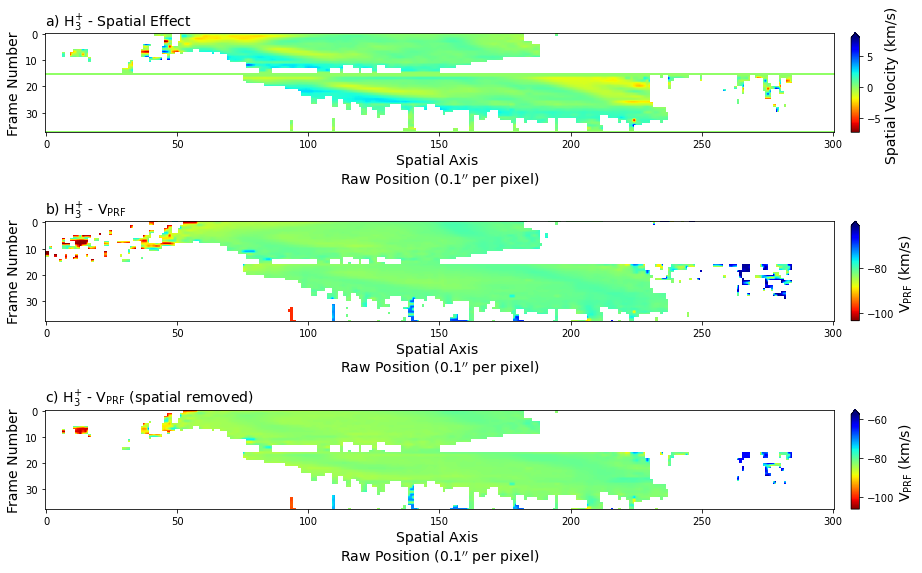

In [2]:
ang_diam = 40.58867 # arcseconds
# ang_diam/(0.1) slit unit = 0.1 arcsec/pixel
limb_vel = 12.572 # V_equator of Jupiter in km/s

# vel_slope = limb_vel / (ang_diam/(0.1)/2)
vel_slope = limb_vel * 2 / (ang_diam / (0.1))

x = np.linspace(-150,150,301)
rot_rate = vel_slope * x
# rot_rate = rot_rate - rot_rate[150]

h3p_plan_vel = h3p_los_shifted + 0

for i in range(np.size(h3p_los_shifted, 0)):
    h3p_plan_vel[i,:] = h3p_los_shifted[i,:] - rot_rate


spatial_velocity = h3p_int_shifted + 0
spatial_velocity[::] = 0

for i in range(np.size(spatial_velocity, 1)):
    for j in range(1, np.size(spatial_velocity, 0)-1):
        if j not in (15,16):
            y = np.arange(3)
            p = np.array((h3p_int_shifted[j-1][i], h3p_int_shifted[j][i], h3p_int_shifted[j+1][i]))
#             print(j,i)
    #         plt.figure()
    #         plt.plot(y, p, 'k.', label='original')
            f = sp.interpolate.interp1d(y,p)
            xnew = np.linspace(0,2,7)
    #         plt.figure()
    #         plt.plot(xnew, f(xnew), 'r.', label='interpolate')
    #         plt.legend()
    #         print(f(xnew[2]), f(xnew[4]))
            p1 = f(xnew[2])
            p3 = f(xnew[4])
            di = (p3 - p1)/(p3 + p1)
            dv = 7.99*di

            if np.isreal(dv):
                spatial_velocity[j,i] = dv

# h2_spat_vel2 = fits.open('h2_spatial_vel2.fits', ignore_missing_end=True)[0].data
# h2_plan_vel2 = fits.open('h2_plan_vel2.fits', ignore_missing_end=True)[0].data

# spatial_velocity2 = spatial_velocity + 0
# spatial_velocity2[np.isnan(h2_spat_vel2)] = np.nan
# spatial_velocity2[spatial_velocity <= 1.5] = np.nan

# h3p_plan_vel2 = h3p_plan_vel + 0
# h3p_plan_vel2[h3p_plan_vel2 > 5] = np.nan
# h3p_plan_vel2[h3p_plan_vel2 < -1] = np.nan
# h3p_plan_vel2[h3p_los_shifted_error > 1] = np.nan
# h3p_plan_vel2[np.isnan(h2_plan_vel2)] = np.nan

# spatial_velocity2[np.isnan(h3p_plan_vel2)] = np.nan

h3p_corrected_vel = h3p_plan_vel-spatial_velocity
# h3p_corrected_vel[h3p_corrected_vel > 85] = 85
# h3p_corrected_vel[h3p_corrected_vel < 80] = 80

# h3p_plan_vel[h3p_plan_vel > 3] = 3
# h3p_plan_vel[h3p_plan_vel < -3] = -3


fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(311)
plt.imshow(spatial_velocity*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Spatial Velocity (km/s)',size=14)

fig.add_subplot(312)
plt.imshow(h3p_plan_vel*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('b) H$_3^{+}$ - V$_{\mathrm{PRF}}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig.add_subplot(313)
plt.imshow(h3p_corrected_vel*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('c) H$_3^{+}$ - V$_{\mathrm{PRF}}$ (spatial removed)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

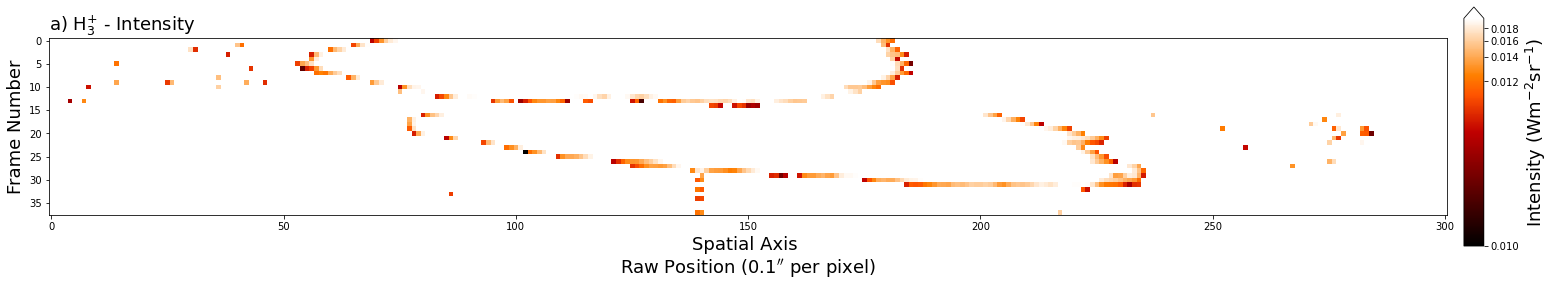

In [3]:
h3p_bright2 = h3p_int_shifted + 0
h3p_bright2[h3p_int_shifted > 0.02] = np.nan
h3p_bright2[h3p_int_shifted < 0.01] = np.nan
# h3p_bright2[16:,:78] = np.nan
# h3p_bright2[16:,245:] = np.nan

fig = plt.figure(figsize=(24,4), tight_layout=True)

fig.add_subplot(111)
plt.imshow(h3p_bright2, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

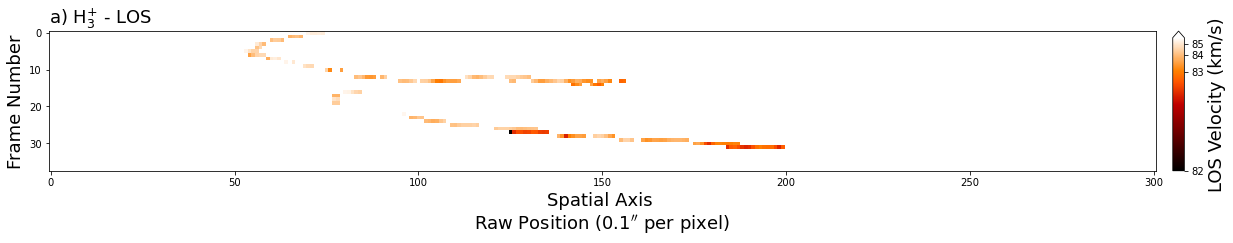

In [4]:
los_vel4 = h3p_corrected_vel + 0
# los_vel4[:16] = np.nan
los_vel4[:][np.isnan(h3p_bright2[:])] = np.nan
los_vel4[los_vel4 < 80] = np.nan
los_vel4[los_vel4 > 87] = np.nan
los_vel4[:,:50] = np.nan
los_vel4[:,200:] = np.nan
los_vel4[:16,170:] = np.nan
los_vel4[:16,70:90][los_vel4[:16,70:90] < 83] = np.nan
# los_vel4[:,:175][los_vel4[:,:175] < 82.5] = np.nan
# los_vel4[:,:120][los_vel4[:,:120] < 82.5] = np.nan
# los_vel4[:,120:180][los_vel4[:,120:180] < 82] = np.nan
# los_vel4[:,120:180][los_vel4[:,120:180] > 85] = np.nan

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(313)
plt.imshow(los_vel4, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - LOS', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='LOS Velocity (km/s)',size=18)

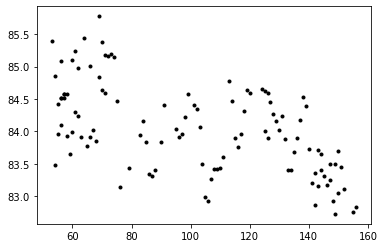

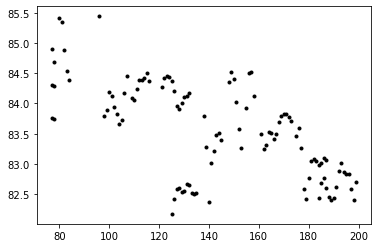

In [5]:
arr = los_vel4 + 0
for i in range(0,300):
    arr[:,i] = i
xt = arr[:16][np.isfinite(los_vel4[:16])]
vt = los_vel4[:16][np.isfinite(los_vel4[:16])]

xb = arr[16:][np.isfinite(los_vel4[16:])]
vb = los_vel4[16:][np.isfinite(los_vel4[16:])]

plt.figure()
plt.plot(xt,vt, 'k.')

plt.figure()
plt.plot(xb, vb, 'k.')

83.47920598994662
0.1706066649171473


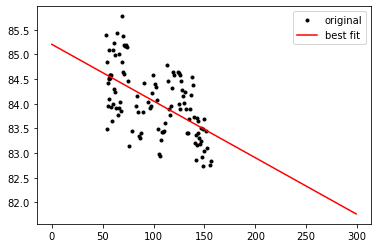

In [6]:
arr = los_vel4 + 0
for i in range(0,300):
    arr[:,i] = i
xt = arr[:16][np.isfinite(los_vel4[:16])]
vt = los_vel4[:16][np.isfinite(los_vel4[:16])]


mod = LinearModel()

pars = mod.guess(vt, x=xt)
out = mod.fit(vt, pars, x=xt)

mt = out.params['slope'].value
bt = out.params['intercept'].value
sig_mt = out.params['slope'].stderr
sig_bt = out.params['intercept'].stderr

# x_fit = np.linspace(110,219,110)
xtf = np.linspace(0,299,300)
vtf = mt * xtf + bt
vterr = np.sqrt(sig_mt**2 + sig_bt**2)

plt.figure()
plt.plot(xt, vt,'.k', label = 'original')
plt.plot(xtf, vtf, 'r', label = 'best fit')
# plt.vlines(50, ymin=77, ymax=90, color='b')
# plt.vlines(95, ymin=77, ymax=90, color='b')
# plt.vlines(140, ymin=77, ymax=90, color='y')
# plt.vlines(180, ymin=77, ymax=90, color='y')
# plt.hlines(87, xmin=0, xmax=300)
plt.legend()

print(vtf[np.where(xtf==150)][0])
print(vterr)

83.46767220547821
0.2333125492569256


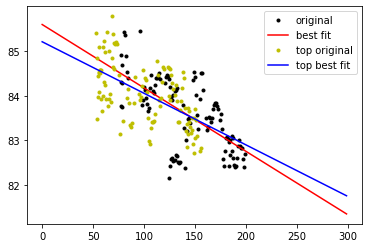

In [7]:
arr = los_vel4 + 0
for i in range(0,300):
    arr[:,i] = i
xb = arr[16:][np.isfinite(los_vel4[16:])]
vb = los_vel4[16:][np.isfinite(los_vel4[16:])]

mod = LinearModel()

pars = mod.guess(vb, x=xb)
out = mod.fit(vb, pars, x=xb)

mb = out.params['slope'].value
bb = out.params['intercept'].value
sig_mb = out.params['slope'].stderr
sig_bb = out.params['intercept'].stderr

# x_fit = np.linspace(110,219,110)
xbf = np.linspace(0,299,300)
vbf = mb * xbf + bb
vberr = np.sqrt(sig_mb**2 + sig_bb**2)

plt.figure()
plt.plot(xb, vb,'.k', label = 'original')
plt.plot(xbf, vbf, 'r', label = 'best fit')
plt.plot(xt, vt,'.y', label = 'top original')
plt.plot(xtf, vtf, 'b', label = 'top best fit')
# plt.ylim(80,90)
# plt.vlines(231, ymin=77, ymax=90, color='b')
# plt.vlines(89, ymin=77, ymax=90, color='b')
# plt.vlines(140, ymin=77, ymax=90, color='y')
# plt.vlines(180, ymin=77, ymax=90, color='y')
# plt.hlines(79, xmin=0, xmax=300)
plt.legend()

print(vbf[np.where(xbf==150)][0])
print(vberr)

In [8]:
vtf[np.where(xtf==150)][0] - vbf[np.where(xbf==150)][0]

0.011533784468412023

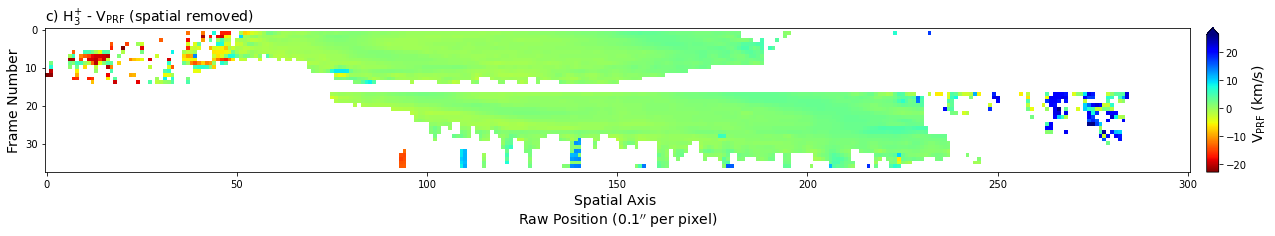

In [9]:
h3p_corrected_vel_sec1 = np.delete(h3p_corrected_vel, np.s_[16:], axis=0)
h3p_corrected_vel_sec2 = np.delete(h3p_corrected_vel, np.s_[:16], axis=0)

h3p_vprf_sec1 = h3p_corrected_vel_sec1 - vtf[np.where(xtf==150)][0]
h3p_vprf_sec2 = h3p_corrected_vel_sec2 - vbf[np.where(xbf==150)][0]

h3p_vprf = np.vstack((h3p_vprf_sec1, h3p_vprf_sec2))
# h3p_vprf[h3p_vprf > 1] = 1
# h3p_vprf[h3p_vprf < -3] = -3
h3p_vprf[0] = np.nan
h3p_vprf[15] = np.nan
h3p_vprf[16] = np.nan
h3p_vprf[-1] = np.nan
h3p_vprf[15:,:50] = np.nan


fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(313)
plt.imshow(h3p_vprf*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('c) H$_3^{+}$ - V$_{\mathrm{PRF}}$ (spatial removed)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

In [10]:
h3p_los_shifted_error

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [11]:
h3p_los_shifted_error_sec1 = np.delete(h3p_los_shifted_error, np.s_[16:], axis=0)
h3p_los_shifted_error_sec2 = np.delete(h3p_los_shifted_error, np.s_[:16], axis=0)

In [12]:
vterr

0.1706066649171473

In [13]:
vberr

0.2333125492569256

In [14]:
spat_err = fits.open('h3p_spat_err.fits', ignore_missing_end=True)[0].data
spat_err

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [15]:
spat_err_sec1 = np.delete(spat_err, np.s_[16:], axis=0)
spat_err_sec2 = np.delete(spat_err, np.s_[:16], axis=0)

In [16]:
h3p_tot_error_sec1 = np.sqrt((h3p_los_shifted_error_sec1)**2 + (vterr)**2 + (spat_err_sec1)**2)
h3p_tot_error_sec2 = np.sqrt((h3p_los_shifted_error_sec2)**2 + (vberr)**2 + (spat_err_sec2)**2)

h3p_tot_error = np.vstack((h3p_tot_error_sec1, h3p_tot_error_sec2))
h3p_tot_error

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

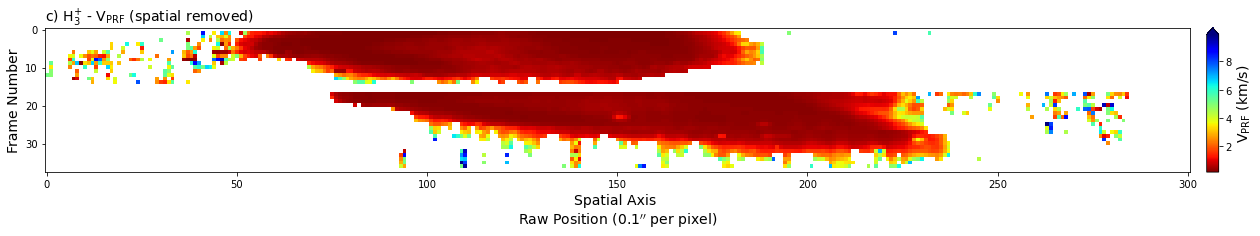

In [17]:
fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(313)
plt.imshow(h3p_tot_error, cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('c) H$_3^{+}$ - V$_{\mathrm{PRF}}$ (spatial removed)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

In [18]:
hdu1 = fits.PrimaryHDU(h3p_vprf)
hdu1.writeto('h3p_vprf.fits', overwrite=True)

hdu2 = fits.PrimaryHDU(h3p_tot_error)
hdu2.writeto('h3p_vprf_err.fits', overwrite=True)